In [3]:
%%bash

PORTS=($(seq 7001 1 7006))

rm -f appendonly.aof
rm -f dump.rdb
for i in ${PORTS[@]}
do
    rm -rf $i
    mkdir $i
    touch $i/redis.conf
    touch $i/nodes.conf
    echo "port $i
cluster-enabled yes
cluster-config-file $i/nodes.conf
cluster-node-timeout 5000
appendonly yes" >> $i/redis.conf
done


redis_pids=()
for i in ${PORTS[@]}
do
    redis-server ./$i/redis.conf &
    redis_pids+=($!)
done


sleep 5

CMD="redis-cli --cluster create"
for i in ${PORTS[@]}; do CMD+=" 127.0.0.1:$i"; done
CMD+=" --cluster-replicas 1"
$CMD

for pid in "${redis_pids[@]}"; do
    wait "$pid"
done


P. S. здесь ругался на синтаксис, запустил с терминала
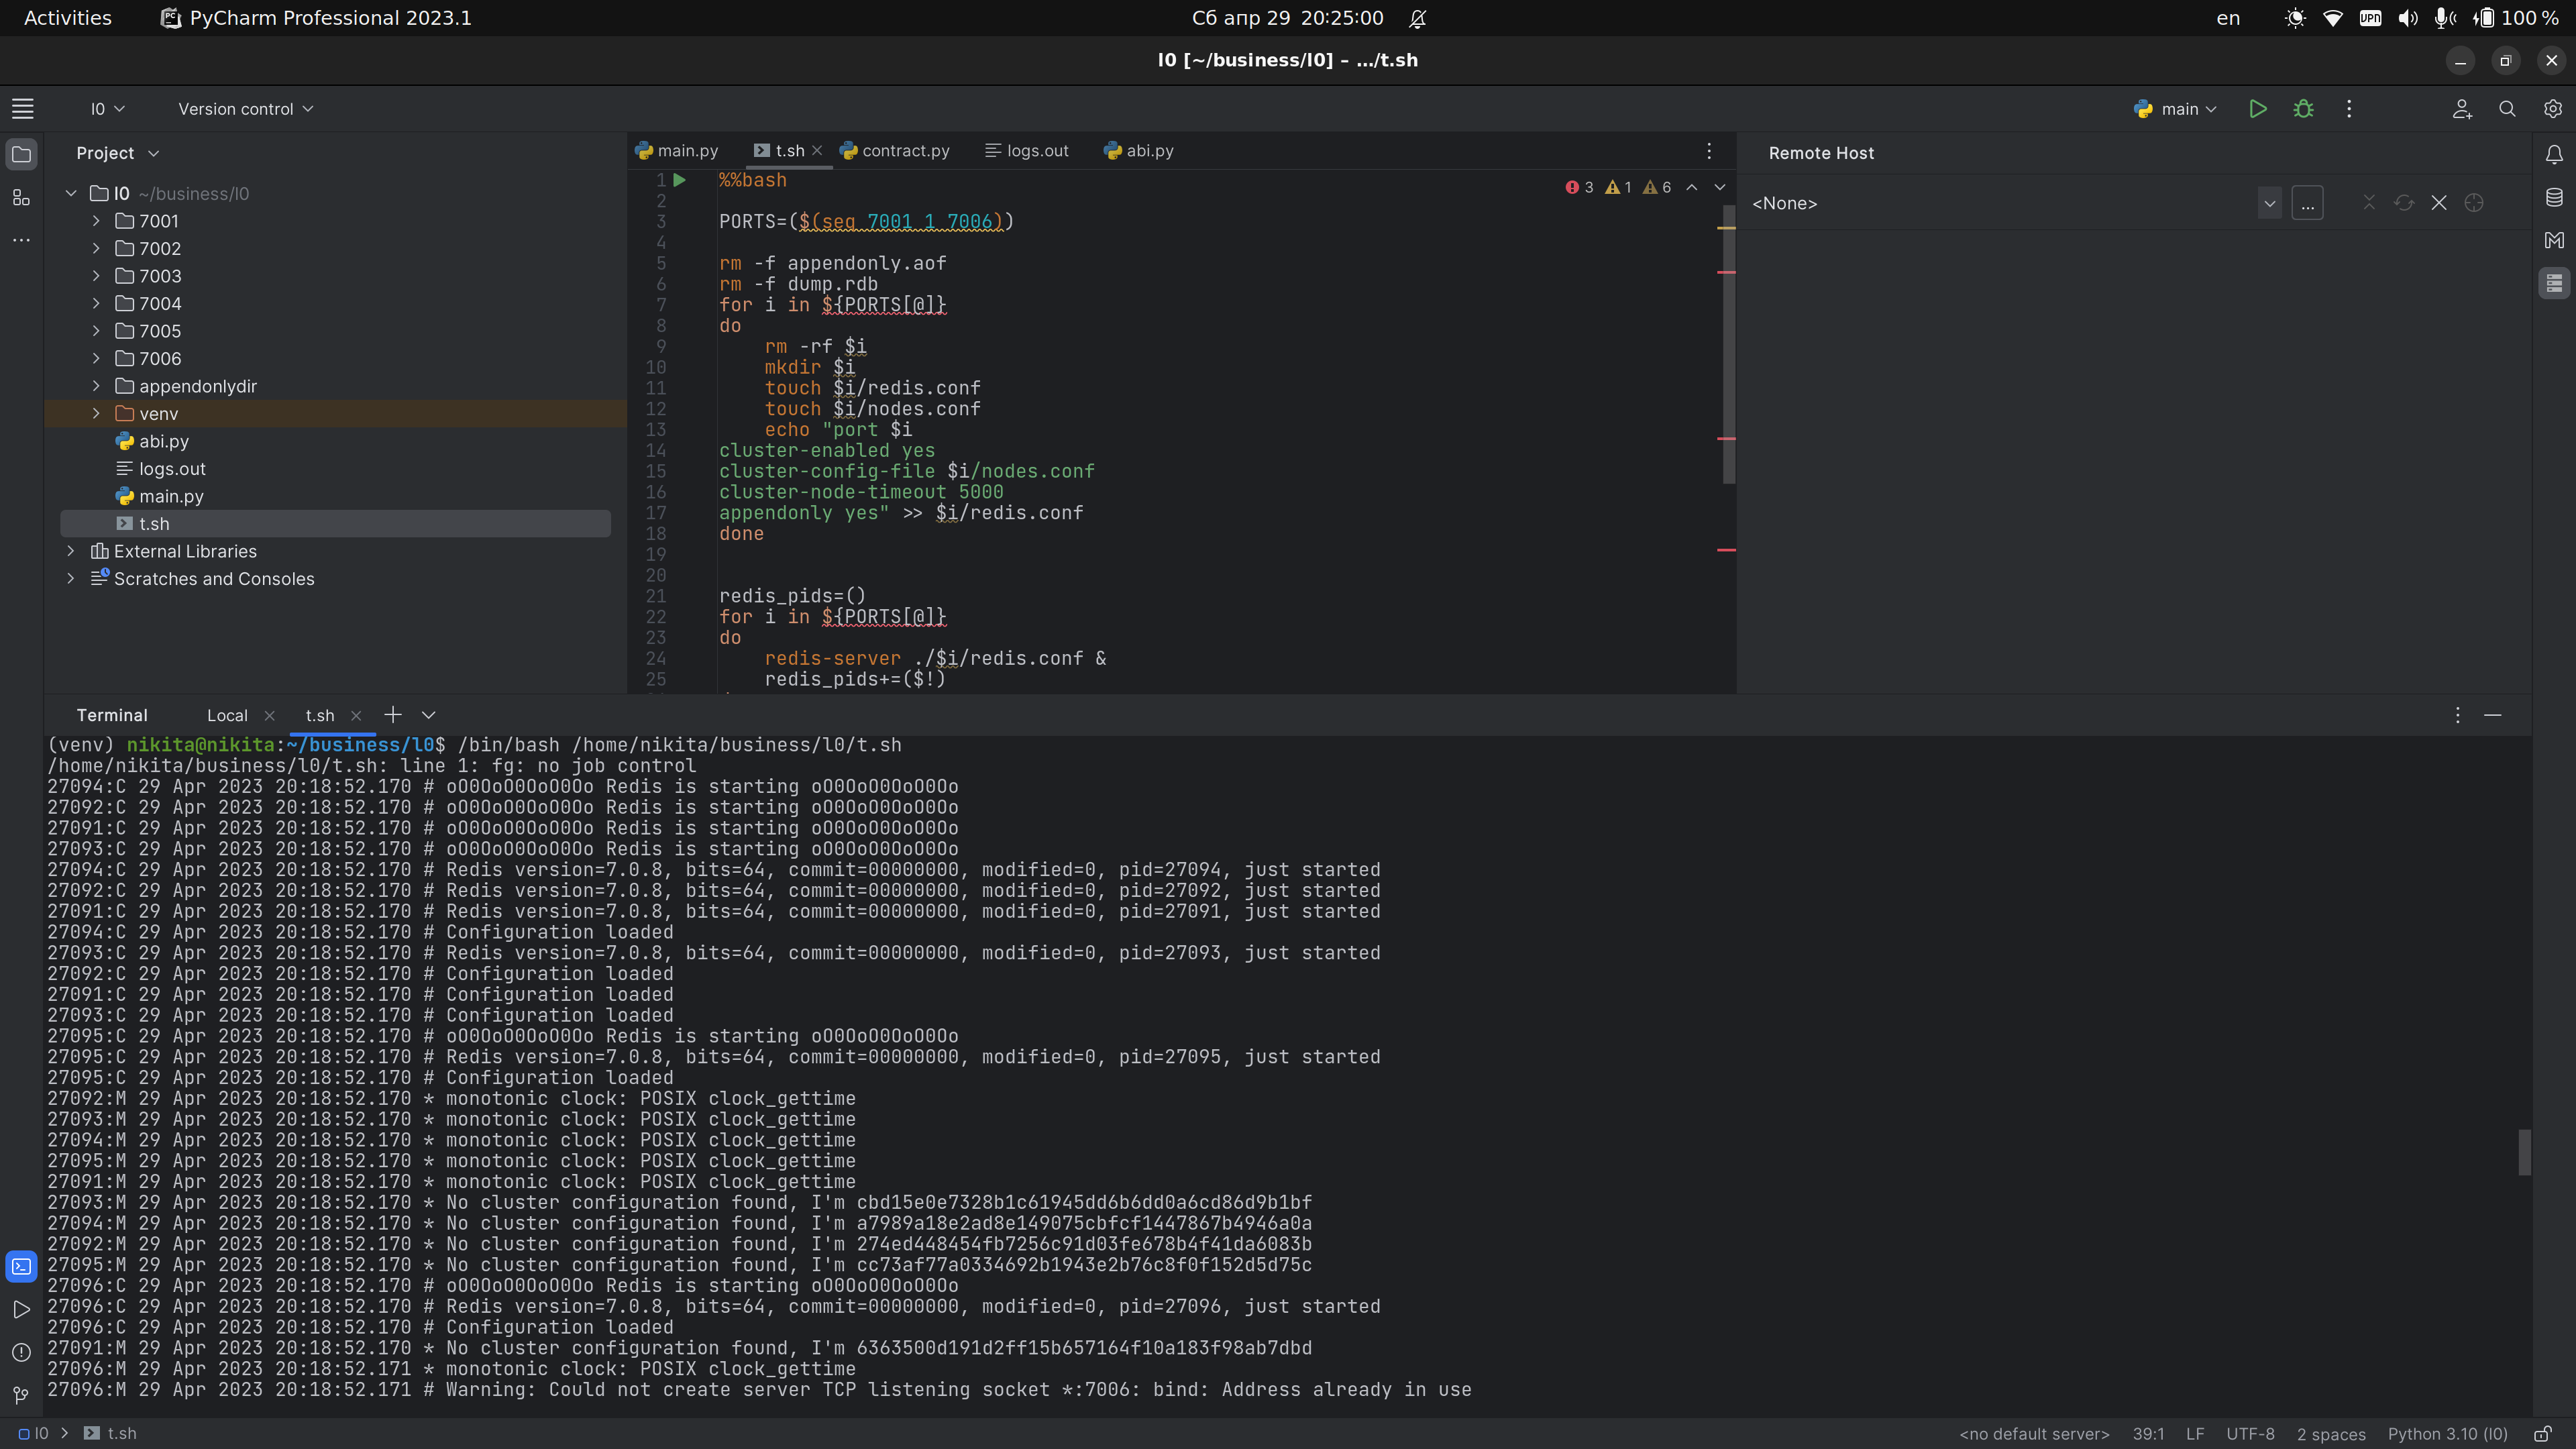